In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance/StudentsPerformance.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/student-performance/StudentsPerformance.csv')

In [4]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
df.shape

(1000, 8)

In [6]:
df.size

8000

In [7]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [8]:
pd.set_option('Display.max_columns',None)
pd.set_option('Display.max_rows',None)

In [9]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [10]:
pd.reset_option('Display.max_columns',None)
pd.reset_option('Display.max_rows',None)

In [11]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [12]:
a = df.isnull().sum()

In [13]:
a

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [14]:
null_v = round((df.isnull().sum() *100)/len(df),2)

In [15]:
null_v

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

In [16]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

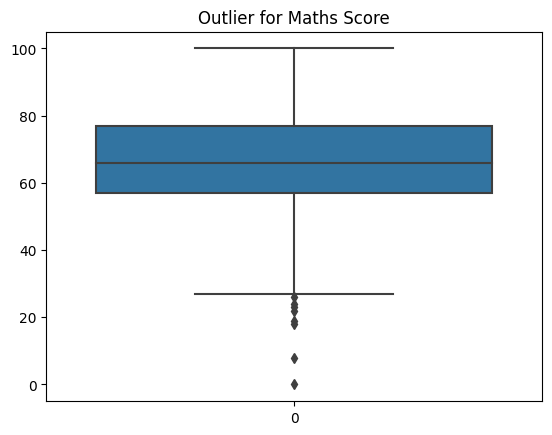

In [17]:
plt.title('Outlier for Maths Score')
sns.boxplot(df['math score']);

In [18]:
q3 = np.percentile(df['math score'],75)
q1 = np.percentile(df['math score'],25)
q3,q1

(77.0, 57.0)

In [19]:
iqr = q3-q1

In [20]:
iqr

20.0

In [21]:
ub = q3+(1.5*iqr)
lb = q1-(1.5*iqr)

In [22]:
ub,lb

(107.0, 27.0)

In [23]:
df = df[(df['math score'] <= ub) & (df['math score'] >=lb)]

In [24]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


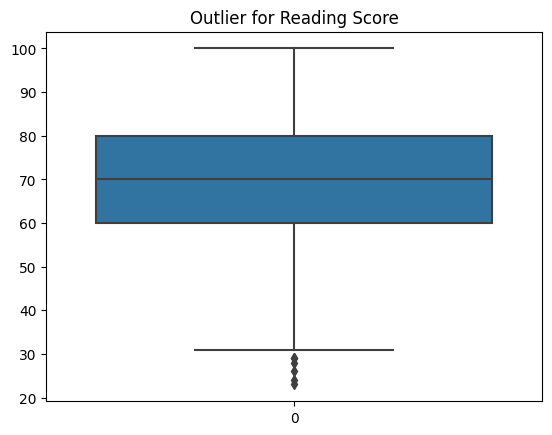

In [25]:
plt.title('Outlier for Reading Score')
sns.boxplot(df['reading score']);

In [26]:
q3 = np.percentile(df['reading score'],75)
q1 = np.percentile(df['reading score'],25)
q3,q1

(80.0, 60.0)

In [27]:
iqr = q3-q1

In [28]:
iqr

20.0

In [29]:
ub = q3+(1.5*iqr)
lb = q1-(1.5*iqr)

In [30]:
ub,lb

(110.0, 30.0)

In [31]:
df = df[(df['reading score'] <= ub) & (df['reading score'] >=lb)]

In [32]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


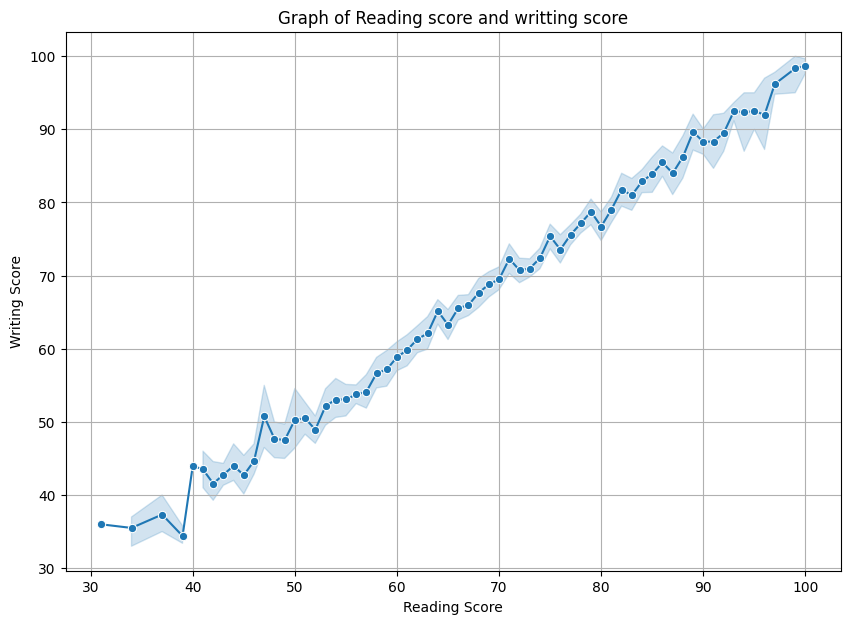

In [33]:
## Line plot of Reading and Writthing Score
plt.figure(figsize=(10,7))
sns.lineplot(x='reading score', y='writing score', data=df, marker='o')
plt.title("Graph of Reading score and writting score")
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.grid(True)
plt.show()

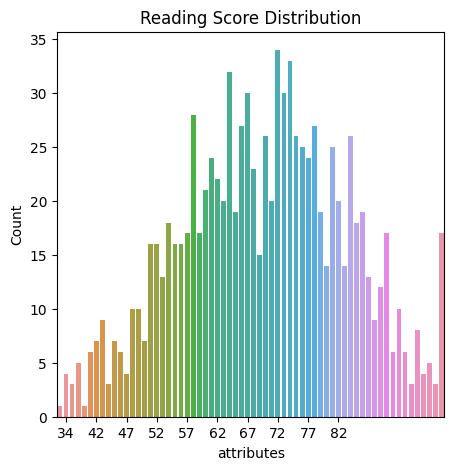

In [34]:
## Count Plot for Reading Distribution
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='reading score')
plt.title('Reading Score Distribution')
plt.xlabel('attributes')
plt.ylabel('Count')
plt.xticks(range(1, 50, 5))
plt.show();

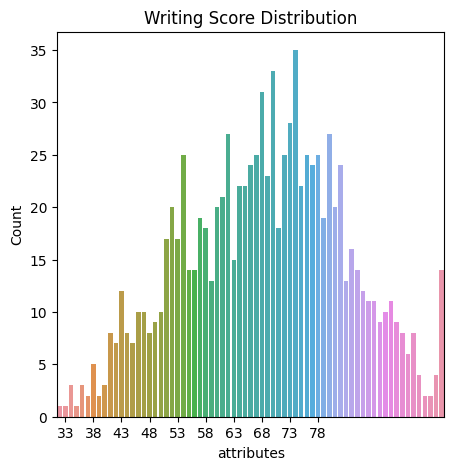

In [35]:
## Count Plot for Writting Distribution
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='writing score')
plt.title('Writing Score Distribution')
plt.xlabel('attributes')
plt.ylabel('Count')
plt.xticks(range(1, 50, 5))
plt.show();